<a href="https://colab.research.google.com/github/sayanghorui/samplecode/blob/master/practice_boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import boston_housing
from keras import models,layers
import numpy as np

Using TensorFlow backend.


In [0]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [0]:
train_data.shape

(404, 13)

In [0]:
test_data.shape

(102, 13)

In [0]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [0]:
train_targets[0]

15.2

### Normalizing the data

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

### Building Model

In [0]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64,activation='relu',input_shape = (train_data.shape[1],)))
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

###K-fold validation

In [0]:
n = 4
num_val_samples = len(train_data) // n
num_epochs=100
all_scores= []
for i in range(n):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples : (i + 1)* num_val_samples]
  val_targets = train_targets[i * num_val_samples : (i + 1)* num_val_samples]

  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1)* num_val_samples:]], axis = 0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1)* num_val_samples:]], axis = 0)

  model = build_model()
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data,val_targets,verbose=0)
  all_scores.append(val_mae)

processing fold # 0












processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
all_scores

[2.0489497940139016, 2.9942296235868247, 2.601878562776169, 2.6147363280305767]

In [0]:
np.mean(all_scores)

2.564948577101868

###Keeping validation log at each fold and plotting

In [0]:
num_epochs=500
all_mae_histories=[]
n = 4
num_val_samples = len(train_data) // n

for i in range(n):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples : (i + 1)* num_val_samples]
  val_targets = train_targets[i * num_val_samples : (i + 1)* num_val_samples]

  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1)* num_val_samples:]], axis = 0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1)* num_val_samples:]], axis = 0)

  model1 = build_model()
  history = model1.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0, validation_data=(val_data, val_targets),)
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)

processing fold # 0












processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

for x in all_mae_histories:
  print(np.mean(x))

2.269772873000343
2.8598735798750776
2.776318768180243
2.565948789459644


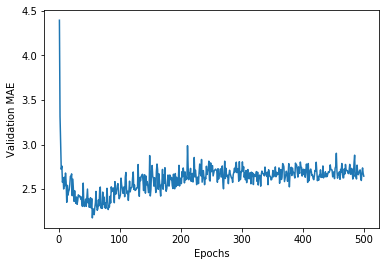

In [0]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [0]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

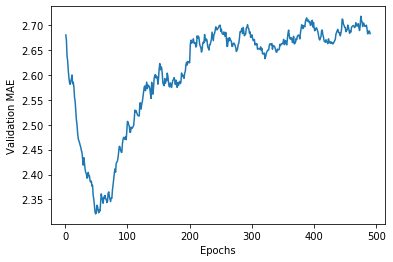

In [0]:
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

###Final Model

In [0]:
model2 = build_model()
model2.fit(train_data, train_targets,epochs=100, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model2.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 727us/step


In [0]:
test_mae_score

2.4689754317788517